In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_marketing = pd.read_csv('marketing_data.csv')

In [ ]:
df_marketing = df_marketing[df_marketing.Year_Birth >= 1960]
df_marketing =  df_marketing.rename(columns={ i : i.replace(' ', '') for i in list(df_marketing.columns)})
df_marketing = df_marketing[df_marketing.Income.notnull()]
df_marketing.Income =  (df_marketing.Income.str.replace('$','').str.replace(',','')).astype(float)
df_marketing['Age'] = 2021 - df_marketing.Year_Birth
df_marketing

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,1,0,0,0,0,0,1,0,SP,51
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,5,0,0,0,0,1,1,0,CA,60
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,7,0,0,0,0,0,0,0,AUS,54
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,7,1,0,0,0,0,1,0,SP,32
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/14,0,78,...,5,0,0,0,0,0,0,0,SP,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,4,0,0,0,0,0,0,0,US,45
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,8,0,0,0,0,0,0,0,SP,44
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,8,0,0,0,0,0,0,0,SP,45
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,3,0,0,0,0,0,0,0,IND,43


In [ ]:
df_marketing_Age_Income = df_marketing[['Age', 'Income']]
df_marketing_Age_Income

,Age,Income
0,51,84835.0
1,60,57091.0
3,54,32474.0
4,32,21474.0
7,54,44931.0
...,...,...
2235,45,66476.0
2236,44,31056.0
2237,45,46310.0
2238,43,65819.0


In [ ]:
df_marketing_Age_Income.std()

Age           8.196068
Income    26775.035539
dtype: float64

In [ ]:
df_marketing_Age_Income.mean()

Age          46.803507
Income    50294.647521
dtype: float64

## Estandarización de Datos con Z score

## $ Z_{i} = \frac{x_{i} - mean(x)}{std(x)} $

In [ ]:
df_marketing_Age_Income['Age_Z'] = (df_marketing_Age_Income.Age - df_marketing_Age_Income.Age.mean()) / df_marketing_Age_Income.Age.std()
df_marketing_Age_Income['Income_Z'] = (df_marketing_Age_Income.Income - df_marketing_Age_Income.Income.mean()) / df_marketing_Age_Income.Income.std()
df_marketing_Age_Income

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Income,Age_Z,Income_Z
0,51,84835.0,0.512013,1.290021
1,60,57091.0,1.610101,0.253832
3,54,32474.0,0.878042,-0.665570
4,32,21474.0,-1.806172,-1.076400
7,54,44931.0,0.878042,-0.200323
...,...,...,...,...
2235,45,66476.0,-0.220045,0.604345
2236,44,31056.0,-0.342055,-0.718529
2237,45,46310.0,-0.220045,-0.148820
2238,43,65819.0,-0.464065,0.579807


In [ ]:
df_marketing_Age_Income.std()

Age             8.196068
Income      26775.035539
Age_Z           1.000000
Income_Z        1.000000
dtype: float64

In [ ]:
df_marketing_Age_Income.mean()

Age         4.680351e+01
Income      5.029465e+04
Age_Z      -1.181374e-16
Income_Z    1.084716e-16
dtype: float64

## Distancia euclidiana entre 2 puntos

## $ d (p,q) = \sqrt{\sum (p_{i} -q_{i})^{2}} $

In [ ]:
df_dis_euc = df_marketing_Age_Income.tail(3).reset_index()
df_dis_euc

,index,Age,Income,Age_Z,Income_Z
0,2237,45,46310.0,-0.220045,-0.148820
1,2238,43,65819.0,-0.464065,0.579807
2,2239,52,94871.0,0.634023,1.664848


La distancia entre los clientes con las variables **sin estandarizar** 

In [ ]:
print('Distancia entre cliente 0 y 1')
print(((df_dis_euc.iloc[0,1] - df_dis_euc.iloc[1,1])**2 + (df_dis_euc.iloc[0,2] - df_dis_euc.iloc[1,2])**2)**0.5)
print('Distancia entre cliente 0 y 2')
print(((df_dis_euc.iloc[0,1] - df_dis_euc.iloc[2,1])**2 + (df_dis_euc.iloc[0,2] - df_dis_euc.iloc[2,2])**2)**0.5)

Distancia entre cliente 0 y 1
19509.000102516788
Distancia entre cliente 0 y 2
48561.00050452009


La distancia entre los clientes con las variables **estandarizadas**

In [ ]:
print('Distancia entre cliente 0 y 1')
print(((df_dis_euc.iloc[0,3] - df_dis_euc.iloc[1,3])**2 + (df_dis_euc.iloc[0,4] - df_dis_euc.iloc[1,4])**2)**0.5)
print('Distancia entre cliente 0 y 2')
print(((df_dis_euc.iloc[0,3] - df_dis_euc.iloc[2,3])**2 + (df_dis_euc.iloc[0,4] - df_dis_euc.iloc[2,4])**2)**0.5)

Distancia entre cliente 0 y 1
0.7684022718287951
Distancia entre cliente 0 y 2
2.0046996187028268


## Clustering de K-means

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Age_Inc = pd.read_csv('ageinc.csv', names = ['Income', 'Age'],skiprows=1)
Age_Inc['Income_Z'] = (Age_Inc.Income - Age_Inc.Income.mean()) / Age_Inc.Income.std()
Age_Inc['Age_Z'] = (Age_Inc.Age - Age_Inc.Age.mean()) / Age_Inc.Age.std()
Age_Inc

,Income,Age,Income_Z,Age_Z
0,101743,58,0.550812,1.693570
1,49597,27,-0.777331,-1.130565
2,36517,52,-1.110474,1.146963
3,33223,49,-1.194372,0.873660
4,72994,53,-0.181416,1.238064
...,...,...,...,...
995,70615,29,-0.242008,-0.948363
996,95102,41,0.381668,0.144851
997,42203,35,-0.965654,-0.401756
998,16975,31,-1.608203,-0.766161


Text(0, 0.5, 'Age')

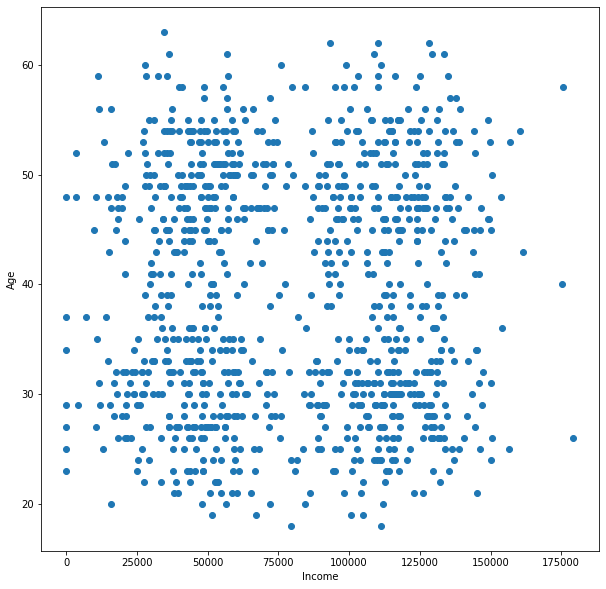

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(x = Age_Inc.Income,
            y = Age_Inc.Age,)
plt.xlabel('Income')
plt.ylabel('Age')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans( n_clusters = 4,
                random_state = 10)
model.fit(Age_Inc[['Income_Z', 'Age_Z']])

KMeans(n_clusters=4, random_state=10)

In [ ]:
Age_Inc['Cluster'] = model.labels_
Age_Inc.head(3)

,Income,Age,Income_Z,Age_Z,Cluster
0,101743,58,0.550812,1.693570,2
1,49597,27,-0.777331,-1.130565,3
2,36517,52,-1.110474,1.146963,1


<Figure size 1440x1440 with 0 Axes>

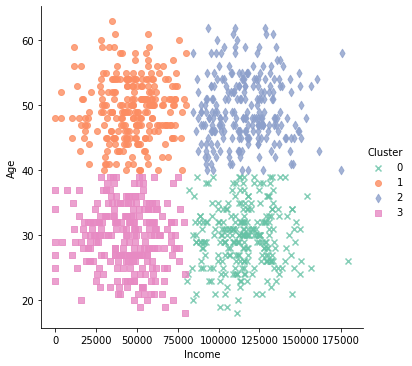

In [ ]:
plt.figure(figsize = (20,20))
sns.lmplot( x = 'Income',
            y = 'Age',
            data = Age_Inc,
            hue = 'Cluster',
            markers = ['x','o','d','s'],
            fit_reg = False,
             palette="Set2")

## PCA Analisis de Componentes Principales

In [ ]:
df = pd.read_csv('three_col.csv')
df.head()

,income,age,days_since_purchase
0,56432,31,492
1,137580,38,551
2,68285,59,304
3,93617,51,507
4,113441,54,509


In [ ]:
columns = df.columns
columns_z = []

for col in columns:
    df[col + '_Z'] = (df[col] - df[col].mean()) /df[col].std()
    columns_z.append(col + '_Z')

df.head()

,income,age,days_since_purchase,income_Z,age_Z,days_since_purchase_Z
0,56432,31,492,-0.606833,-0.748848,0.818321
1,137580,38,551,1.505879,-0.135469,1.349109
2,68285,59,304,-0.298237,1.704668,-0.873001
3,93617,51,507,0.361289,1.003663,0.953267
4,113441,54,509,0.877413,1.266540,0.971260


In [ ]:
model = KMeans( n_clusters = 4,
                random_state = 10)

df['Cluster'] = model.fit_predict(df[columns_z])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)
df['PC1'], df['PC2'] = zip(* pca.fit_transform(df[columns_z]))
df.head()

,income,age,days_since_purchase,income_Z,age_Z,days_since_purchase_Z,Cluster,PC1,PC2
0,56432,31,492,-0.606833,-0.748848,0.818321,1,-0.146251,0.208657
1,137580,38,551,1.505879,-0.135469,1.349109,3,-2.017272,0.188518
2,68285,59,304,-0.298237,1.704668,-0.873001,2,0.815283,-1.339297
3,93617,51,507,0.361289,1.003663,0.953267,3,-0.938956,-1.076085
4,113441,54,509,0.877413,1.266540,0.971260,3,-1.317778,-1.146315


<Figure size 1440x1440 with 0 Axes>

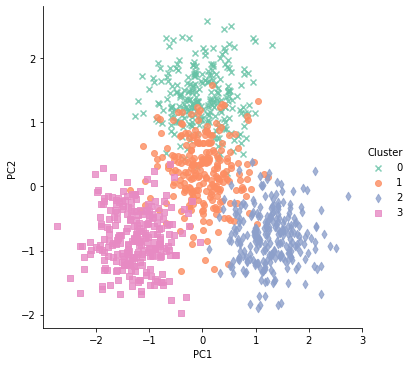

In [ ]:
plt.figure(figsize = (20,20))
sns.lmplot( x = 'PC1',
            y = 'PC2',
            data = df,
            hue = 'Cluster',
            markers = ['x','o','d','s'],
            fit_reg = False,
             palette="Set2")

In [ ]:
df.groupby(['Cluster'])[['income', 'age', 'days_since_purchase']].mean().reset_index()

,Cluster,income,age,days_since_purchase
0,0,114704.120968,29.338710,302.919355
1,1,46153.196787,29.341365,498.188755
2,2,45002.099602,49.490040,299.661355
3,3,113118.222222,49.769841,502.583333


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=11bf7be5-3b62-4605-8e79-42e562c1fd79' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>